In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from PIL import Image as im
import glob

In [5]:
!ls -l /content/drive/MyDrive/DataSet/CityScapes/

total 68683243
-rw------- 1 root root       26651 Jan 10 05:25 index.html
-rw------- 1 root root 47230218747 Mar 21  2016 leftImg8bit_trainextra.zip
-rw------- 1 root root 11592327197 Mar 21  2016 leftImg8bit_trainvaltest.zip
-rw------- 1 root root 11509067083 Mar 21  2016 rightImg8bit_trainvaltest.zip


In [6]:
CS_ZIP_PATH = "/content/drive/MyDrive/DataSet/CityScapes"
LEFT_IMAGE= CS_ZIP_PATH + "/" + "leftImg8bit_trainvaltest.zip"
RIGHT_IMAGE= CS_ZIP_PATH + "/" + "rightImg8bit_trainvaltest.zip"

In [7]:
!ls -l $RIGHT_IMAGE

-rw------- 1 root root 11509067083 Mar 21  2016 /content/drive/MyDrive/DataSet/CityScapes/rightImg8bit_trainvaltest.zip


In [8]:
!unzip -qq $LEFT_IMAGE -d /content
!unzip -qq $RIGHT_IMAGE -d /content

replace /content/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/license.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [9]:
!ls /content/leftImg8bit/train/ /content/rightImg8bit/

/content/leftImg8bit/train/:
aachen	cologne     erfurt   jena	      strasbourg  ulm
bochum	darmstadt   hamburg  krefeld	      stuttgart   weimar
bremen	dusseldorf  hanover  monchengladbach  tubingen	  zurich

/content/rightImg8bit/:
test  train  val


In [ ]:
!find /content/leftImg8bit/train/ -name "*.png" | wc -l
!find /content/leftImg8bit/test/ -name "*.png" | wc -l
!find /content/leftImg8bit/val/ -name "*.png" | wc -l

2975
1525
500


In [ ]:
!ls /content/rightImg8bit/ /content/rightImg8bit/train
!find /content/rightImg8bit/train/ -name "*.png" | wc -l
!find /content/rightImg8bit/test/ -name "*.png" | wc -l
!find /content/rightImg8bit/val/ -name "*.png" | wc -l

/content/rightImg8bit/:
test  train  val

/content/rightImg8bit/train:
aachen	cologne     erfurt   jena	      strasbourg  ulm
bochum	darmstadt   hamburg  krefeld	      stuttgart   weimar
bremen	dusseldorf  hanover  monchengladbach  tubingen	  zurich
2975
1525
500


In [ ]:
!ls /content/rightImg8bit/train/ /content/rightImg8bit/test/ /content/rightImg8bit/val/

/content/rightImg8bit/test/:
berlin	bielefeld  bonn  leverkusen  mainz  munich

/content/rightImg8bit/train/:
aachen	cologne     erfurt   jena	      strasbourg  ulm
bochum	darmstadt   hamburg  krefeld	      stuttgart   weimar
bremen	dusseldorf  hanover  monchengladbach  tubingen	  zurich

/content/rightImg8bit/val/:
frankfurt  lindau  munster


In [5]:
CS_RIGHT_ROOT = Path("/content/rightImg8bit")
CS_LEFT_ROOT = Path("/content/leftImg8bit")
sdirs = ["train", "val" ,"test"]

# Helper Functions

**Get list of directories and image count**

In [ ]:
def get_Image_data(parent_dir="abc", s_dir="abcd"):
  dir_list, file_count = [], []
  subdir = parent_dir / s_dir

  for dir in os.listdir(subdir):
    subdir = parent_dir / s_dir / dir
    fcount = len([file1 for file1 in os.listdir(subdir)])
    #print(f" {dir}: {fcount} ")
    dir_list.append(dir)
    file_count.append(fcount)

  return dir_list, file_count

**Plot the graph**

In [ ]:
def plot_graph(label = "abc", d_train="abcd", d_val="abcd", d_test="abc"):
    
    plt.figure(figsize=(30,10))
    width = 0.5
    
    plt.bar(d_train["Dname"], d_train["fcount"], width,label="Training")
    plt.bar(d_val["Dname"], d_val["fcount"], width,label="Validation")
    plt.bar(d_test["Dname"], d_test["fcount"], width,label="Testing")
    
    plt.title(label + " Drive folder Images", fontsize=20)
    plt.xlabel('Drive Names')
    plt.ylabel('Image count')
    
    plt.xticks(rotation=30, ha="right")
    plt.grid(visible=True, which='major', axis='y')
    plt.legend()
    plt.show()

**Cityscapes RIGHT Directory EDA**

In [ ]:
ROOT_DIR = CS_RIGHT_ROOT  #Fetch the list of images in the subdirectory
dirs_trn, fcount_trn = get_Image_data(ROOT_DIR, sdirs[0])
dirs_val, fcount_val = get_Image_data(ROOT_DIR, sdirs[1])
dirs_test, fcount_test = get_Image_data(ROOT_DIR, sdirs[2])

In [ ]:
dfR_train, dfR_val, dfR_test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

dfR_train = pd.DataFrame(list(zip(dirs_trn,fcount_trn)), columns=["Dname", "fcount"])
dfR_val = pd.DataFrame(list(zip(dirs_val,fcount_val)), columns=["Dname", "fcount"])
dfR_test = pd.DataFrame(list(zip(dirs_test,fcount_test)), columns=["Dname", "fcount"])

dfR_train.sort_values("fcount",inplace=True)
dfR_val.sort_values("fcount",inplace=True)
dfR_test.sort_values("fcount",inplace=True)

**Cityscapes LEFG Directory EDA**

In [ ]:
ROOT_DIR = CS_LEFT_ROOT  #Fetch the list of images in the subdirectory
dirs_trn, fcount_trn = get_Image_data(ROOT_DIR, sdirs[0])
dirs_val, fcount_val = get_Image_data(ROOT_DIR, sdirs[1])
dirs_test, fcount_test = get_Image_data(ROOT_DIR, sdirs[2])

In [ ]:
dfL_train, dfL_val, dfL_test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

dfL_train = pd.DataFrame(list(zip(dirs_trn,fcount_trn)), columns=["Dname", "fcount"])
dfL_val = pd.DataFrame(list(zip(dirs_val,fcount_val)), columns=["Dname", "fcount"])
dfL_test = pd.DataFrame(list(zip(dirs_test,fcount_test)), columns=["Dname", "fcount"])

dfL_train.sort_values("fcount",inplace=True)
dfL_val.sort_values("fcount",inplace=True)
dfL_test.sort_values("fcount",inplace=True)

In [ ]:
!ls *.csv

cs_right_test.csv  cs_right_train.csv  cs_right_val.csv


**Consistency Check**

In [ ]:
assert dfL_train["fcount"].any() == dfR_train["fcount"].any(), "Training data count MIS-match"
assert dfL_val["fcount"].any() == dfR_val["fcount"].any(), "Training data count MIS-match"
assert dfL_test["fcount"].any() == dfR_test["fcount"].any(), "Training data count MIS-match"

In [ ]:
assert dfL_train["Dname"].any() == dfR_train["Dname"].any(), "Training data directory MIS-match"
assert dfL_val["Dname"].any() == dfR_val["Dname"].any(), "Training data directory MIS-match"
assert dfL_test["Dname"].any() == dfR_test["Dname"].any(), "Training data directory MIS-match"

**Save to CSV files**

In [ ]:
dfL_train.to_csv("cs_left_train.csv", index=False)
dfL_val.to_csv("cs_left_val.csv", index=False)
dfL_test.to_csv("cs_left_test.csv", index=False)

In [ ]:
dfR_train.to_csv("cs_right_train.csv", index=False)
dfR_val.to_csv("cs_right_val.csv", index=False)
dfR_test.to_csv("cs_right_test.csv", index=False)

**PLOT THE GRAPHS FOR LEFT AND RIGHT DIRECTORIES**

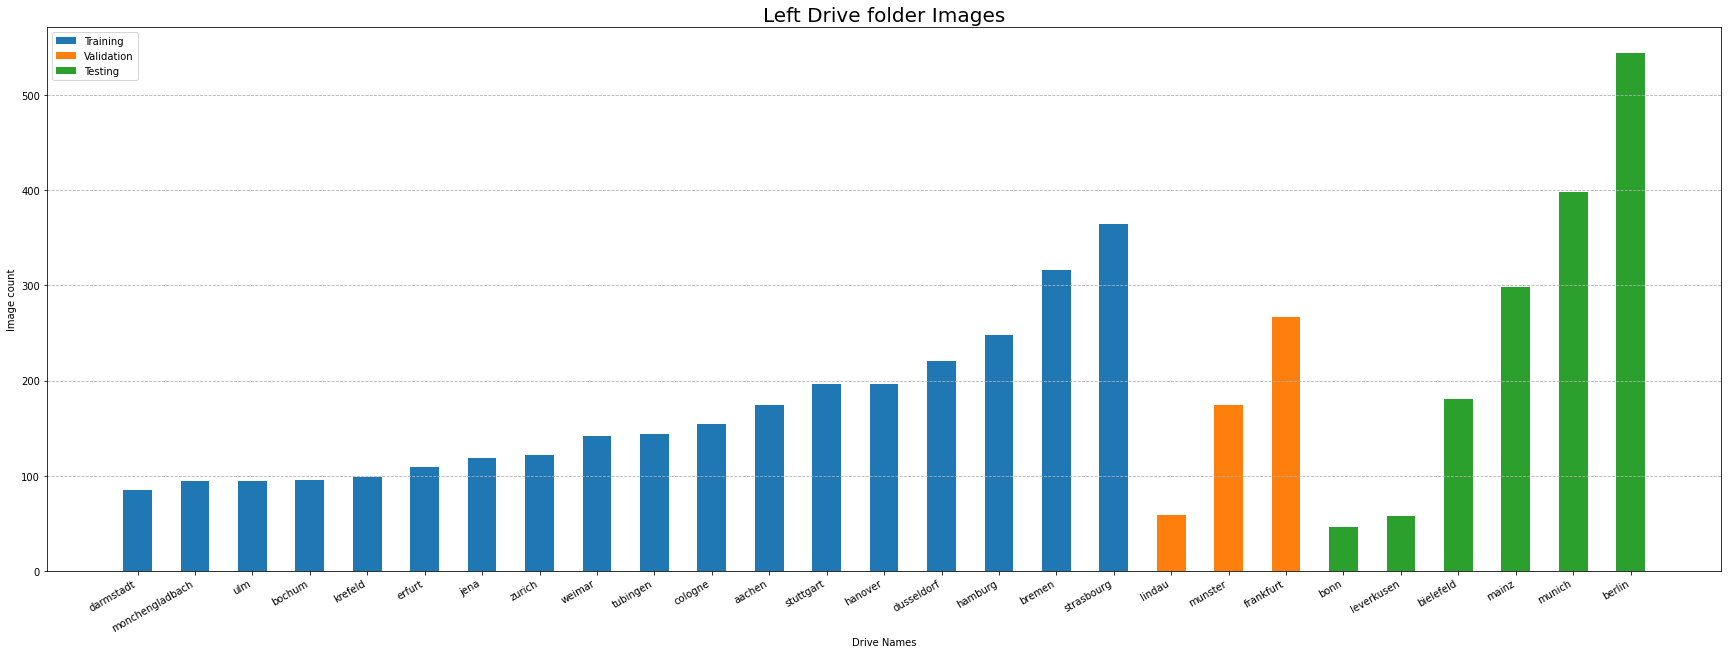

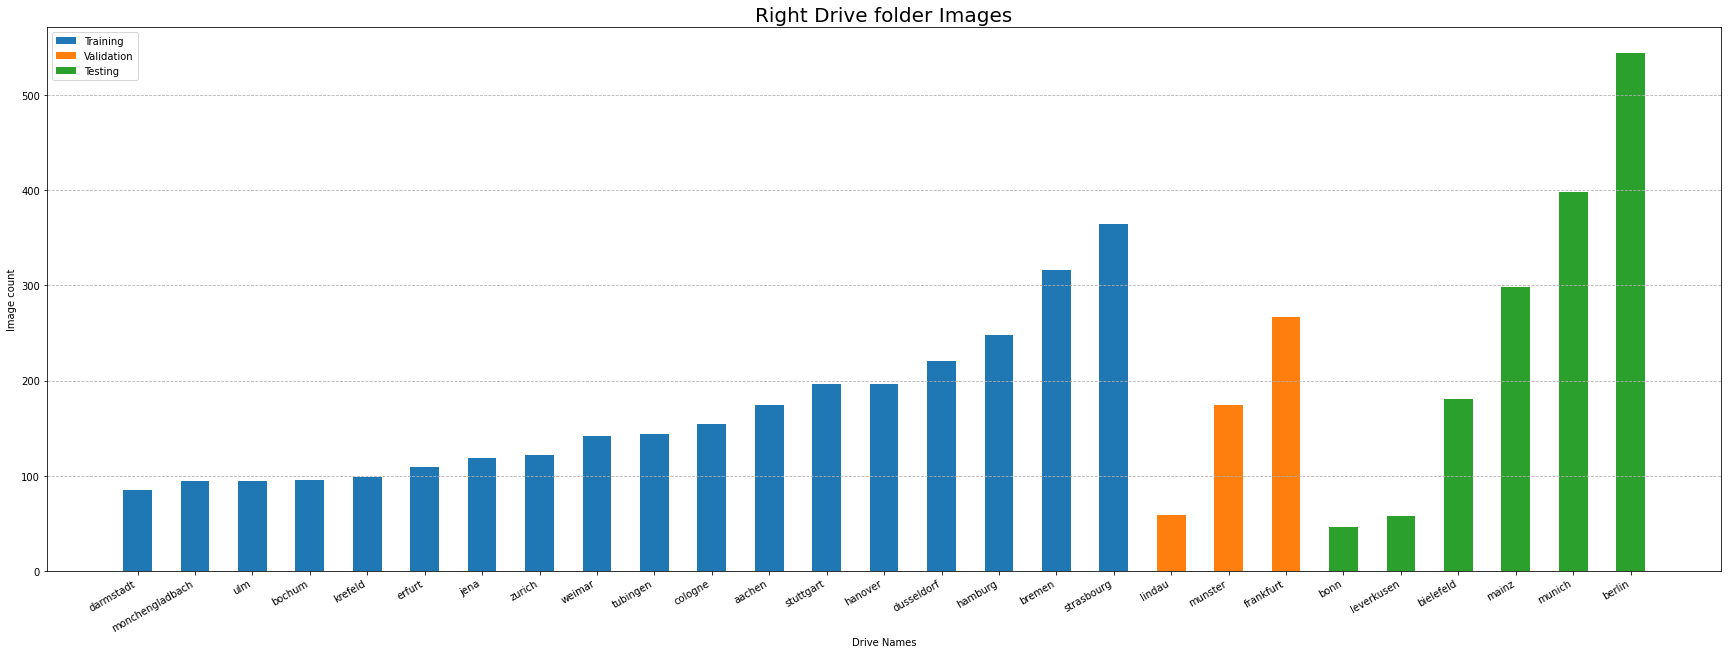

In [ ]:
plot_graph(label="Left", d_train=dfL_train, d_val=dfL_val, d_test=dfL_test)
plot_graph(label="Right", d_train=dfR_train, d_val=dfR_val, d_test=dfR_test)

**Verify the contents of the Dataframe**

In [ ]:
list(zip (dfL_train["fcount"], dfR_train["fcount"]))

[(85, 85),
 (94, 94),
 (95, 95),
 (96, 96),
 (99, 99),
 (109, 109),
 (119, 119),
 (122, 122),
 (142, 142),
 (144, 144),
 (154, 154),
 (174, 174),
 (196, 196),
 (196, 196),
 (221, 221),
 (248, 248),
 (316, 316),
 (365, 365)]

In [ ]:
list(zip (dfL_train["Dname"], dfR_train["Dname"]))

[('darmstadt', 'darmstadt'),
 ('monchengladbach', 'monchengladbach'),
 ('ulm', 'ulm'),
 ('bochum', 'bochum'),
 ('krefeld', 'krefeld'),
 ('erfurt', 'erfurt'),
 ('jena', 'jena'),
 ('zurich', 'zurich'),
 ('weimar', 'weimar'),
 ('tubingen', 'tubingen'),
 ('cologne', 'cologne'),
 ('aachen', 'aachen'),
 ('stuttgart', 'stuttgart'),
 ('hanover', 'hanover'),
 ('dusseldorf', 'dusseldorf'),
 ('hamburg', 'hamburg'),
 ('bremen', 'bremen'),
 ('strasbourg', 'strasbourg')]

In [ ]:
TRAIN_DIR_1 = Path("/content/leftImg8bit/train/aachen")
FILE_NAME = "aachen_000000_000019_leftImg8bit.png"

In [ ]:
sample_file = TRAIN_DIR_1 / FILE_NAME

In [ ]:
img = im.open(sample_file).convert("RGB")

In [ ]:
img.size

(2048, 1024)

In [ ]:
img.close()

In [10]:
for file1 in glob.glob(CS_LEFT_DIR):
  print(file1)
  break

/content/leftImg8bit/


**Check if the images have the same size**

In [5]:
def Check_Image_data(parent_dir="abc", s_dir="abcd"):
  dir_list, file_sizes = [], []
  fsize = ()
  FIRST = False
  subdir = os.path.join(parent_dir, s_dir)
  
  for dir in os.listdir(subdir):
    subdir = os.path.join(parent_dir, s_dir, dir)
    print(subdir, end=" ")    
    find_files = subdir + "/" + "*.png"

    for i, file1 in enumerate(glob.glob(find_files)):
      im_size = im.open(file1).convert("RGB").size
      if FIRST:
        if fsize != im_size:
          dir_list.append(file1)
          file_sizes.append(im_size)
          print(f"Size mismatch {fsize}  {file1} ")        
          #assert fsize == im_size, f"Sizes {fsize}  {im_size} "        
      else:
        fsize = im_size
        FIRST = True
        print(fsize, end=" ")
        continue
    print(i+1)
  if len(dir_list) != 0:
    print(f"dir_list:{dir_list} , file_sizes: {file_sizes} ")
  else:
    print(f"All the files in {parent_dir} have {fsize}.")

In [12]:
len(sdirs)

3

In [16]:
for i in range(len(sdirs)):
  Check_Image_data(CS_LEFT_ROOT, sdirs[i])

for i in range(len(sdirs)):
  Check_Image_data(CS_RIGHT_ROOT, sdirs[i])

/content/leftImg8bit/train/darmstadt (2048, 1024) 85
/content/leftImg8bit/train/hamburg 248
/content/leftImg8bit/train/tubingen 144
/content/leftImg8bit/train/krefeld 99
/content/leftImg8bit/train/ulm 95
/content/leftImg8bit/train/jena 119
/content/leftImg8bit/train/strasbourg 365
/content/leftImg8bit/train/zurich 122
/content/leftImg8bit/train/monchengladbach 94
/content/leftImg8bit/train/dusseldorf 221
/content/leftImg8bit/train/cologne 154
/content/leftImg8bit/train/bremen 316
/content/leftImg8bit/train/erfurt 109
/content/leftImg8bit/train/hanover 196
/content/leftImg8bit/train/bochum 96
/content/leftImg8bit/train/aachen 174
/content/leftImg8bit/train/weimar 142
/content/leftImg8bit/train/stuttgart 196
All the files in /content/leftImg8bit/ hae (2048, 1024).
/content/leftImg8bit/val/frankfurt (2048, 1024) 267
/content/leftImg8bit/val/lindau 59
/content/leftImg8bit/val/munster 174
All the files in /content/leftImg8bit/ hae (2048, 1024).
/content/leftImg8bit/test/munich (2048, 1024) 

# **Animation**

In [16]:
import matplotlib.animation as animation
from IPython.display import clear_output

In [23]:
def create_video(left_d="abcd", right_d="abc", image_f="abcd"):
    fig, (axL, axR) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.05, hspace=0)
    axL.axis('off')
    axR.axis('off')
    axL.set_title('Left Image')
    axR.set_title('Right Image')

    fis = []
    for i in range(len(left_d)):
        im1 = axL.imshow(plt.imread(left_d[i]), animated=True)
        im2 = axR.imshow(plt.imread(right_d[i]), animated=True)
        fis.append([im1,im2])
        
    ani = animation.ArtistAnimation(fig, fis, interval=200, blit=False)
    image_folder =  image_f + ".mp4"
    vidio_path = ROOT_VIDEO_DIR / image_folder
    print(f"vidio_path: {vidio_path}")
    ani.save(vidio_path)
    fig.clear()
    plt.clf()
    plt.close(fig=fig)
    clear_output()    
    del ani

In [18]:
def number(fname):
  return int(fname.split('_')[1])
#/content/leftImg8bit/train/aachen/aachen_000093_000019_leftImg8bit.png
#/content/leftImg8bit/train/erfurt/erfurt_000001_000019_leftImg8bit.png
#/content/leftImg8bit/train/darmstadt/darmstadt_000003_000019_leftImg8bit.png

In [19]:
ROOT_VIDEO_DIR=Path("/content/drive/MyDrive/EDA_Animation/CS/Train")

In [20]:
data_dir = 0
dir_name = "darmstadt"

In [21]:
left_dir  = os.path.join(CS_LEFT_ROOT,sdirs[data_dir], dir_name) + "/*"
right_dir  = os.path.join(CS_RIGHT_ROOT,sdirs[data_dir], dir_name) + "/*"
print(left_dir, right_dir)
left_list = [filename for filename in glob.glob(left_dir)]
right_list = [filename for filename in glob.glob(right_dir)]
left_list  = list(sorted(left_list, key=number))
right_list = list(sorted(right_list, key=number))

/content/leftImg8bit/train/darmstadt/* /content/rightImg8bit/train/darmstadt/*


In [24]:
create_video(left_d=left_list, right_d=right_list, image_f=dir_name)    